# Homework Assignment 1 - Chem 277B

Author: Brent Allen Thorne

**Warm Up**

## 1) Motivation

In this course we will focus on machine learning algorithms and their applications. For that purpose, you should be fluent in python and we therefore want to repeat a few programming and approximation techniques you might have learned in previous classes. If that was not the case, now you have the occasion to get them to know and also practice the application of these basic techniques.  

**Our Personanl Motivation**

Our intent is to uncover new insights through experimentation, benchmarking, and reflection.

The ultimaite goal is to challenge our assumptions, test boundaries, and deepen understanding through reproducible, performance-driven inquiry.

$\square$

## 2) Preparation

First, we want to import *numpy* and *matplotlob*:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For many applications we need to work with derivatives, i.e. in case of gradient descent, backpropagation, for solving differential equations and for deriving approximations. One important method for deriving approximations is the **Taylor series**:
<br>
$$
f(x) = \sum_{n=0}^{\infty}\frac{1}{n!}\frac{d^n f(x)}{dx^n}|_{x=x_0}\left(x - x_0\right)^n
$$
<br>

**Code Organization**

We create a set of custom libraries to separate this notebook presentation from our source logic. Code snippets will be shown where appropriate, however full implementation details can be found in the supporting source files.

In [2]:
import importlib
import taylor as taylor
import palindrome as palindrome

importlib.reload(taylor)
importlib.reload(palindrome)

!ls *.*py* # show our sources

HW_01.ipynb  kernel_registry.py  palindrome.py	taylor.py


During development we reload our libraries as we extend them, thus our liberal application of `importlib.reload(...)`.

We shall repeatedly import libraries to demostrate context, however only when reload is called can side-effects be introduced for the user/developer. 

$\square$

## 3) Exercise

### **3a) Taylor Series Approximation**

>Consider the function $f(x) = \sqrt{1 + x}$ in the range zero to four. Derive the 1st and 2nd order Taylor approximation of $f(x)$ at $x_0 = 0$ and **plot the exact function in the same graph together with both approximations**. Add legends for all three graphs and don't forget axis labels!<br> Estimate $\sqrt{1.5}$, $\sqrt{2}$ and $\sqrt{3}$ from both approximations and compare the values to the exact values (create a small table using a **dataframe**). 

**Clarification of "Range"**

In casual usage, the word *range* often refers to input values. For example, someone might say "range zero to four" when describing a span of values. This supports an informal interpretation, where range loosely means the interval being considered.

In formal mathematics however, *range* refers to the set of output values a function can produce. The corresponding term for input values is *domain*.

Initially, we assumed the colloquial meaning was intended and defined a "colloquial domain" as $x \in [0, 4]$. We now adopt a more rigorous interpretation, defining the domain as $x \in [-1, 15]$. This choice reflects the input values that yield outputs in the range $[0, 4]$, since $\sqrt{1-1} = 0$ and $\sqrt{1+15} = 4$.

The implied meaning of range has a significant impact on how the problem is framed. We chose to proceed with the mathematically rigorous definition, but we acknowledge that our interpretation of a specification can fundamentally influence its implementation.

In [3]:
importlib.reload(taylor)

# Our 'domain' and 'range', strictly in the formal mathmatical sense
print(f'Range: {taylor.func_range}')
print(f'Domain: {taylor.func_domain}')

Range: <Limits: lower=0, upper=4>
Domain: <Limits: lower=-1, upper=15>


Hence the range and domain of our function becomes well defined.

$\square$

##### **Derivation**

Recall:
<br>
$$
\begin{aligned}
 f(x) &= \sum_{n=0}^{\infty}\frac{1}{n!}\frac{d^n f(x)}{dx^n}|_{x=x_0}\left(x - x_0\right)^n\\
      &= f(x_0) + \frac{f'(x_0)}{1!} x + \frac{f''(x_0)}{2!}x^2 + \cdots
\end{aligned}
$$
<br>

<br> Now lets consider,
$$
\begin{aligned}
f(x) &= \sqrt{1 + x} \\
 &= (1+x)^{1/2}.
\end{aligned}
$$

Thus, by the power rule, our 1st derivative is,
$$
\begin{aligned}
f'(x) &= \frac{1}{2} (1 + x)^{-1/2}.
\end{aligned}
$$


Applied the power rule again we find our 2nd derivative is,
$$
\begin{aligned}
f''(x) &= -\frac{1}{4} (1 + x)^{-3/2}.
\end{aligned}
$$

Now let's put this all together for a 2nd order Taylor approximation of $f(x)$ at $x_0 = 0$.
$$
\begin{aligned}
 f(x) 
 &= f(x_0) + \frac{f'(x_0)}{1!}x + \frac{f''(x_0)}{2!}x^2\\
 &= (1+{x_0})^{1/2} + \frac{1}{1!} \left( \frac{1}{2} (1 + {x_0})^{-1/2} \right) x + \frac{1}{2!} \left( -\frac{1}{4} (1 + {x_0})^{-3/2} \right) x^2 \\
  &= (1)^{1/2} + \frac{1}{1!} \left( \frac{1}{2} (1)^{-1/2} \right) x + \frac{1}{2!} \left( -\frac{1}{4} (1)^{-3/2} \right) x^2 \\
  &= \underbrace{\underbrace{1 + \frac{1}{2} x}_{\text{1st}} - \frac{1}{8} x^2}_{\text{2nd}}.
\end{aligned}
$$
Notice that by deriving the 2nd order Taylor approximation we also have the 1st order approximation by taking only the first order terms and dropping the higher order terms.

This wraps up our derivation.

$\square$

Before we move on, let's check our work using sympy.

In [4]:
importlib.reload(taylor)
import inspect

print(inspect.getsource(taylor.TaylorExpansion))

class TaylorExpansion:
    def __init__(self):
        # Symbols
        self.x = sym.Symbol("x")
        self.x_0 = sym.Symbol("x_0")

        # Function
        self.f = sym.sqrt(1 + self.x)

        # Derivatives
        self.f_prime = sym.diff(self.f, self.x)
        self.f_double_prime = sym.diff(self.f_prime, self.x)

        # Evaluated at x_0
        self.f0 = self.f.subs(self.x, self.x_0)
        self.f1 = self.f_prime.subs(self.x, self.x_0)
        self.f2 = self.f_double_prime.subs(self.x, self.x_0)

        # Taylor expansion
        self.f_taylor = (
            self.f0 + self.f1 * self.x + (self.f2 / sym.factorial(2)) * self.x**2
        )
        self.f_taylor_at_0 = self.f_taylor.subs(self.x_0, 0)

    def show_derivatives(self):
        display(sym.Eq(sym.Function("f")(self.x), self.f))
        display(sym.Eq(sym.Function("f'")(self.x), self.f_prime))
        display(sym.Eq(sym.Function("f''")(self.x), self.f_double_prime))

    def show_derivation(self):
        displ

In [5]:
expansion = taylor.TaylorExpansion()
expansion

<TaylorExpansion: f(x) = sqrt(1 + x), centered at x_0>

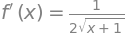

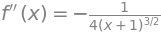

In [6]:
expansion.show_derivatives()

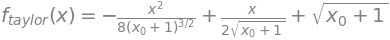

In [7]:
expansion.show_derivation()

This confirms what we found above so let's continue on to plotting our functions.

$\square$

##### **Plot Our Function (Using SymPy)**

For a log-log plot, see: **Plot Our Function (Using Matplotlib)** below.

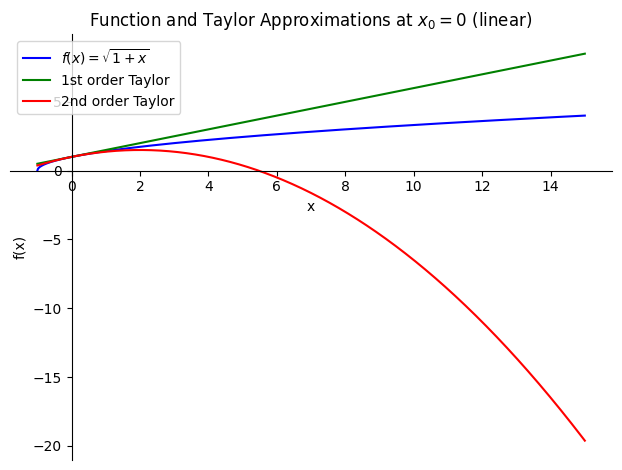

<TaylorPlot: domain=<Limits: lower=-1, upper=15>>


In [8]:
importlib.reload(taylor)
import inspect

plotter = taylor.TaylorSymPlot()
plotter.plot()
print(plotter)
# print(inspect.getsource(taylor.TaylorSymPlot)) # uncomment if you'd like to see the source

Clearly the error for both approximation grows large as we move from the evaluation point, $x_0=0$.
Indeed our 2nd order approximation goes below zero, which is a not good repesentation our orginal monotonic function, $\sqrt{x+1}$ at all.

However, we're not done yet!

Let's try this again using matplotlib numerically for a loglog plotting.  Maybe we can see more clearly what's going on here.

$\square$

##### **Plot our functions (using matplotlib)**

In actuality logarithmic scales are undefined for non-positive values, however unlike sympy.plot, matplotlib will not complain it.

However, while it doesn't complain, it also doesn't plot these values either.

Nonetheless this provides us some important insight into our 2nd order approximaton when it starts to go quite astomptopically wrong.

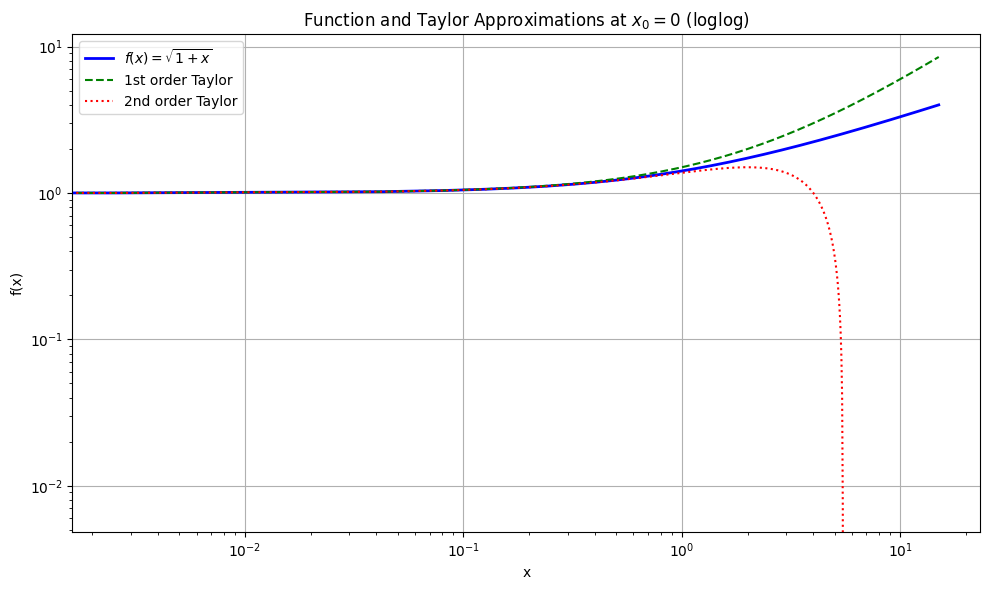

<TaylorNumericPlot: domain=<Limits: lower=-1, upper=15>>


In [9]:
importlib.reload(taylor)
import inspect

plotter = taylor.TaylorNumericPlot()
plotter.plot()
print(plotter)
# print(inspect.getsource(taylor.TaylorNumericPlot)) # uncomment if you'd like to see the source

What a beauty!

It now becomes clear that the range provided in the problem statement, and our rigorous mathematical interpretation of it, makes sense in this context.

Both the linear and log plots show that the error between our original function, $\sqrt{x+1}$, and its approximations grow significantly as we move further from the evaluation point.

In fact, once the second-order approximation dips below zero, it becomes a very poor representation of our original monotonic function, $\sqrt{x+1}$, and thus is effectively useless beyond that point.

That's about it for our plotting.  Let's move on to creating our dataframe.

See also: *Error Analysis* section below.

$\square$ $\square$

##### **Create a dataframe**

Now we move one to building a dataframe.
We are being asked to estimate $\sqrt{1.5}$, $\sqrt{2}$ and $\sqrt{3}$ from both approximations, however our function is $f(x) = \sqrt{1+x}$ so we must subtract 1 to estimate these values using our approximation.

Right?
Let's try not to think about this too much and trust the process.  ;-)

In [10]:
import inspect
importlib.reload(taylor)

table = taylor.TaylorTable()
table.show()
#print(inspect.getsource(taylor.TaylorTable)) # uncomment if you'd like to see the source

,x,y_true,y_t1,y_t2
test 1,0.5,1.224745,1.25,1.21875
test 2,1.0,1.414214,1.50,1.37500
test 3,2.0,1.732051,2.00,1.50000


Our objective here was to estimate $ \sqrt{1.5} $, $ \sqrt{2} $, and $ \sqrt{3} $ using both 1st and 2nd order Taylor approximations of the function $ f(x) = \sqrt{1 + x} $.  
Since our approximation is centered at $ x_0 = 0 $, we adjusted the inputs accordingly by subtracting 1 from each target value.

We then built a dataframe to organize and compare the exact values with our approximations.  
The indexing and column labels were chosen to reflect the structure of our experiment clearly.

As expected, the error increases as we move further from the evaluation point.  
The 2nd order approximation performs better than the 1st order near $ x_0$, however eventually diverges, especially for larger $ x $.  
This behavior aligns with what we've seen in our earlier linear plots.

$\square$

##### **Error Analysis**

To compare our approximated values to the exact values we shall use a bit of Error Analysis, adding columns for Absolute and Relative error, then plotting the results.

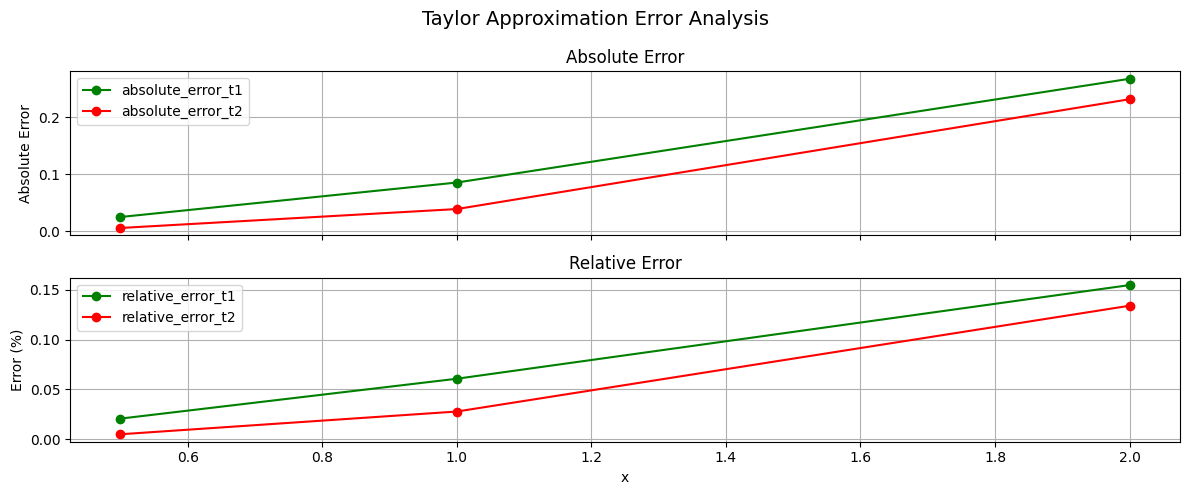

,x,y_true,y_t1,y_t2,absolute_error_t1,absolute_error_t2,relative_error_t1,relative_error_t2
test 1,0.5,1.224745,1.25,1.21875,0.025255,0.005995,0.020621,0.004895
test 2,1.0,1.414214,1.50,1.37500,0.085786,0.039214,0.060660,0.027728
test 3,2.0,1.732051,2.00,1.50000,0.267949,0.232051,0.154701,0.133975


In [11]:
table.plot_errors()
table.show()

At least for our values under test, both our 1st and 2nd order approximations have an average error of less than 10%.
Indeed our 2nd order has less error than the 1st order approximation over our domain.

Above this domain it's a much different story but for now let's revial in the fact we are within an order of maginitude.

_"Close don't count in baseball. Close only counts in horseshoes and hand grenades" --Frank Robinson_

$\square$ $\square$

### **3b) Palindrome Python Class**
Create a **class** *Palindrome_Checker*, that takes a string in its `__init__`. The class then should contain **three methods** of checking if a string is a palindrome: via a loop (use the `break` statement in order to make the code most efficient), via recursion and via the fastest way, which is `My_StringS[::-1]`. In each case the method should return a statement if the input string is a palindrome or not. 

##### **Create a Palindrome Checker Class**

In the end, we created not **three** but **eleven** different method for checking if a string is a palindrome; 'map', 'break_loop', 'loop', 'recursive', 'pythonic', 'memoryview', 'numba', 'torch', 'jax', 'triton', 'numpy'.
We encapsulate our methods with these mode flags to allow us to quickly benchmark and compare our results along the way.

The three basic modes are 'break_loop'*, 'recursive', 'pythonic'.  

We then extended these basic methods further with custom CPU and GPU kernels.

See: **Results and Conclusion** section below for the results of our performance testing.

Grab your coffee and let's get stuck-in!

**Install Additional Libraries**

One of our motivations is to create something that resembles 'production-ready' code.
While we started out with a rather vannilla code base, we continued to develop as many methods as possible.
We eventually developed a KernelRegistry library to detect if the required hardware and packages are present, before loading our kernels.  We wanted to fail safe if these were not not present.

We acknowlegde that this is complete overkill, however once we started we couldn't help ourselves.

In [12]:
# Make sure these are installed if your using DataHub
#!pip install numba
#!pip install torch
#!pip install jax # JAX requires a GPU (not tested on DataHud

We've created a Docker image to simplify these requirements, it's usage is outside the scope of this exercise.

See our github for the details:

https://github.com/fractalclockwork/Chem277B

$\square$

**Create Palindrome_Checker**

We now define our core Python class.

This implementation performs strict type checking and asserts on invalid input types or unsupported modes. Its modular design allowed us to quickly experiment with a wide variety of palindrome-checking algorithms. Docstrings are included throughout to provide clear guidance on class behavior and member functions.

In [13]:
import palindrome as palindrome
import importlib

importlib.reload(palindrome)

pc = palindrome.Palindrome_Checker("racecar")
print(pc.run_mode("pythonic"))
print(pc.run_mode("break_loop"))
print(pc.run_mode("recursive"))

pc.input_str = "crash"
print(pc.run_mode("pythonic"))
print(pc.run_mode("break_loop"))
print(pc.run_mode("recursive"))

Mode 'pythonic': Palindrome
Mode 'break_loop': Palindrome
Mode 'recursive': Palindrome
Mode 'pythonic': Not a palindrome
Mode 'break_loop': Not a palindrome
Mode 'recursive': Not a palindrome


Let's take a peek at one our algorithms.

In [14]:
import inspect

print(inspect.getsource(palindrome.Palindrome_Checker.pythonic_test))

    def pythonic_test(self) -> bool:
        """Check palindrome using string reversal."""
        return self.input_str == self.input_str[::-1]



We made docstrings too.

In [15]:
# usage
help(palindrome.Palindrome_Checker)

Help on class Palindrome_Checker in module palindrome:

class Palindrome_Checker(builtins.object)
 |  Palindrome_Checker(input_str, mode='loop')
 |
 |  A utility class for checking whether a string is a palindrome using various methods.
 |
 |  Parameters
 |  ----------
 |  input_str : str
 |      The string to be tested.
 |
 |   mode : str, optional
 |      The method used for palindrome checking. Options include:
 |      'loop', 'break_loop', 'pythonic', 'map', 'memoryview', 'numba',
 |      'numpy', 'recursive', 'torch', 'triton', 'jax'.
 |      Default is 'loop'.
 |
 |  Methods defined here:
 |
 |  __init__(self, input_str, mode='loop')
 |      Initialize with input string and test mode.
 |
 |  available(self)
 |      Return all supported modes as a list.
 |
 |  break_loop_test(self) -> bool
 |      Check palindrome using loop and break statement.
 |
 |  is_palindrome(self)
 |      Dispatch to selected method.
 |
 |  loop_test(self) -> bool
 |      Check palindrome using direct inde

Check out the source files if you want to see the bloody details.

`palindrome.py` covers the main implementation.

In [16]:
import inspect

# uncomment if you'd like to see the source (or go look at the source files)
#print(inspect.getsource(palindrome.Palindrome_Checker))

These examples show the core requirements of our Class, three distinct methods for checking whether a string is a palindrome, each returning a statement.

But why stop here?

We've cooked up a whole suite of algorithms as custom kernels.  Let's take a quick look at that now.


$\square$

**Define Our Custom Kernels**

We created custom 'kernels' for Numba, PyTorch, Triton, and JAX.  Some of these like Numba run on the host CPU, others like PyTorch and Jax can run on either the CPU or GPU, and Trition requires GPU hardware.

These kernels grew from our profiling results of our intital palindrome methods and the gpu-mode lecture series.

Don't worry if some of this doesn't make sense yet.  I spent my whole Summer doing this so we are kernel mad now.

For now let's look at the Numba kernel as this was our first attempt at a custom JIT kernel.

See: `kernel_registry.py` for how we've created plugins that extend our Palindrome_Checker Class.

In [17]:
import inspect

print(inspect.getsource(palindrome.KernelRegistry._numba_kernel))

    def _numba_kernel(self, njit):
        """Numba-based kernel."""

        @njit
        def numba_palindrome(arr):
            left, right = 0, len(arr) - 1
            while left < right:
                if arr[left] != arr[right]:
                    return False
                left += 1
                right -= 1
            return True

        def wrapper(s):
            arr = np.frombuffer(s.encode("utf-8"), dtype=np.uint8)
            return numba_palindrome(arr)

        return wrapper



See: The **Profiling** section below for more details on cProfile.

$\square$

##### **Sanity Check**  (as if there as any doubt)

Before we kick off the death match, let’s confirm the health of our contenders.

Each algorithm must pass a basic validation suite: positive cases, negative cases, and a few naughty edge cases, before entering the ring.

Only the strong shall survive!!!

In [18]:
# sanity check
import importlib
import palindrome as palindrome
importlib.reload(palindrome)

Palindrome_Checker = palindrome.Palindrome_Checker # we can't reload a single class from a module

DEBUG = False

def debug(msg):
    if DEBUG:
        print(f"[DEBUG] {msg}")

#modes = ['map', 'break_loop', 'loop', 'recursive', 'pythonic', 'memoryview', 'numba', 'numpy', 'torch', 'triton', 'jax']
modes = Palindrome_Checker("").available()

print(f"mode under test: {modes}")

positive_tests = [ '', 'a', 'aa', 'aba', 'abba' ] # Mamma Mia
negative_tests = [ 'ab', 'abb' ]
naughty_tests = [ [], True, False, ord('\ue000'), 69 ]

#naughty_tests = [ '🧠' ] # Actaully this shows a fundumental bug with UTF-8 in modes 'memoryview', 'numba', 'numpy', ...

for mode in modes:
    debug(f"mode: {mode}")
    for test_str in positive_tests:
        debug(f"   test_str: {test_str}")
        assert Palindrome_Checker(test_str, mode = mode).is_palindrome(), f"Failed positive test in mode: {mode} with test string: {test_str}"
    for test_str in negative_tests:
        debug(f"   test_str: {test_str}")        
        assert not Palindrome_Checker(test_str, mode = mode).is_palindrome(), f"Failed negative test in mode: {mode} with test string: {test_str}"
    for test_str in naughty_tests:
        debug(f"   test_str: {test_str}")
        try:
            result = Palindrome_Checker(test_str, mode = mode).is_palindrome()
        except AssertionError as err:
            debug(f"Caught assertion: {err}")
            continue
        assert False, f"Failed naughty test in mode: {mode} with test string: {test_str}"

print("PASSED: sanity checks (ascii only)")

mode under test: ['loop', 'break_loop', 'pythonic', 'map', 'memoryview', 'numpy', 'recursive', 'numba', 'torch', 'jax', 'triton']


/home/plastic/Documents/MSSE/chem277B/hw/HW_01/kernel_registry.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  t = self._torch.from_numpy(arr).to(device)


PASSED: sanity checks (ascii only)


It looks like all our contenders have passed the initial phase and are ready to move forward.

We are zero-copy encoded each string into a tensor. Since we are not writing to it, the non-writable buffer warning from PyTorch is safe to ignore.

Of course, we could have copied the array and avoided the warning entirely. But then, how would you know that we live such a dangerous life?

$\square$

**Profiling**

Before the battle begins, we search for weakness. We are not looking for brute force alone. Instead, we focus on complexity.

We will not analyze every contender. Our attention is on those we can unburdened from excessive call overhead or time-heavy execution paths.

In [19]:
import cProfile, sys
import importlib
import palindrome as palindrome
importlib.reload(palindrome)

pc = palindrome.Palindrome_Checker('a' * 1 * 1024**2, mode='pythonic')
print(f"string size under test in bytes: {sys.getsizeof(pc.input_str)}")
cProfile.run('pc.is_palindrome()', sort='tottime')

string size under test in bytes: 1048617
         5 function calls in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 palindrome.py:124(pythonic_test)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.001    0.001 palindrome.py:58(is_palindrome)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)




Profiling can give us a deeper look into how each function operates, where it slows down, and where it might be refined.
We have already uncovered plenty through analysis, and for now, our work with profiling is done.

$\square$

**Collect Timing Results**

The gates have opened. The contenders step into the ring. Each algorithm stands ready, sharpened and optimized, eager to prove its worth. This will be a clash of logic, speed, and raw computational power.

We will measure execution time, expose inefficiencies, and crown the fastest in our Palindrome Battle Royale. Let the showdown begin.

(Clearly we have been at this for a bit too long and we're starting to crack up.)

In [20]:
import timeit, sys, importlib
import palindrome as palindrome
importlib.reload(palindrome)

checker = palindrome.Palindrome_Checker('')
checker.available()

['loop',
 'break_loop',
 'pythonic',
 'map',
 'memoryview',
 'numpy',
 'recursive',
 'numba',
 'torch',
 'jax',
 'triton']

In [21]:
import timeit, sys, importlib
import palindrome as palindrome
importlib.reload(palindrome)

runs = 3
test_str = 'a' * 25 * 1024**2  # ~25MB string
#test_str = 'a' * 1000 * 1024**2  # ~100MB string for battle royale

pc = palindrome.Palindrome_Checker(test_str)
print(f"test string size (bytes): {sys.getsizeof(pc.input_str)}")

# modes under test (excluding 'recursive' due to stack overflow above ~5k)
modes = pc.available()
top_modes = ['pythonic', 'numba', 'numpy', 'torch', 'triton', 'jax'] # Battle Royale
#modes = top_modes # battle royale mode

timing_results = {}

for mode in modes:
    pc.mode = mode
    try:
        elapsed = timeit.timeit(lambda: pc.is_palindrome(), number=runs)
        timing_results[mode] = elapsed / runs
    except Exception as e:
        timing_results[mode] = float('inf')  # test failed

# sort and print results
sorted_results = sorted(timing_results.items(), key=lambda item: item[1])

print("\nSorted Timing Results:")
for mode, time in sorted_results:
    label = f"{time:.6f}" if time != float('inf') else "Error"
    print(f"{mode:>12}: {label}")

test string size (bytes): 26214441

Sorted Timing Results:
       torch: 0.011095
      triton: 0.011833
       numba: 0.032429
       numpy: 0.038398
    pythonic: 0.038781
         jax: 0.090324
         map: 0.689319
  break_loop: 1.053348
        loop: 1.054335
  memoryview: 1.176570
   recursive: Error


Let's format these results into a table.
We work damn hard to be lazy.

In [22]:
# Format results into tables for markdown

# notes for each method
notes = {
    'numba': 'JIT compiled byte array (fails UTF-8 test)',
    'pythonic': 'Efficient Python slicing',
    'map': 'Map with lambda',
    'loop': 'Loop with early return',
    'break_loop': 'Loop with `break`',
    'memoryview': 'Byte-level access (fails UTF-8 test)',
    'numpy': 'Vectorized NumPy array comparison (fails UTF-8 test)',
    'recursive': 'Stack overflow (fails for large strings)',
    'torch': 'PyTorch implimentation using CUDA',
    'triton': 'Trition JIT CUDA Kernel',
    'jax': 'JAX JIT CUDA Kernel'
}

# add our recursive non-result manually using a N/A time
timing_results['recursive'] = float('inf')  # or None

# sort results
sorted_results = sorted(timing_results.items(), key=lambda item: item[1] if item[1] != float('inf') else float('inf')) # we love our lamba functions

# our results as markdown
print("| Method         | Time (seconds) | Notes                             |")
print("|----------------|----------------|-----------------------------------|")
for mode, time in sorted_results:
    time_str = f"{time:.4f}" if time != float('inf') else "N/A"
    note = notes.get(mode, "")
    print(f"| {mode:<14} | {time_str:<14} | {note:<35} |")

| Method         | Time (seconds) | Notes                             |
|----------------|----------------|-----------------------------------|
| torch          | 0.0111         | PyTorch implimentation using CUDA   |
| triton         | 0.0118         | Trition JIT CUDA Kernel             |
| numba          | 0.0324         | JIT compiled byte array (fails UTF-8 test) |
| numpy          | 0.0384         | Vectorized NumPy array comparison (fails UTF-8 test) |
| pythonic       | 0.0388         | Efficient Python slicing            |
| jax            | 0.0903         | JAX JIT CUDA Kernel                 |
| map            | 0.6893         | Map with lambda                     |
| break_loop     | 1.0533         | Loop with `break`                   |
| loop           | 1.0543         | Loop with early return              |
| memoryview     | 1.1766         | Byte-level access (fails UTF-8 test) |
| recursive      | N/A            | Stack overflow (fails for large strings) |


The results are in. Whether it was too much coffee or not quite enough, the battle has come to a close and the data is on the table.

Each contender revealed its strengths and weaknesses. Some were swift, others stumbled, and a few surprised us with unexpected finesse.

We have measured, compared, and crowned our champions. For now, the arena is quiet. The battle is complete.

$\square$

Or is it? Only time will tell.

The dust may have settled, but the code still lingers. There’s always one more tweak, one more contender, one more surprise waiting in the shadows.

For now, we rest. However the arena never truly closes.

$\square$ $\square$

#####  **Results and Conclusion**

We set out to create a modular and extensible framework to explore a number of algorithmic strategies for evaluating palindrome strings.  
We explored a range of algorithms from Pythonic string reversal, classical loops, to byte-level memory views and JIT-compiled Numba acceleration.  
Our approach was to encapsulate our methods with a mode flag to allow us to quickly benchmark and compare our results.  
We also created a few simple automated sanity tests to make sure we got the same result across all our methods.

Our timing results were generated using strings approximately 25MB in size.
The "recursive" method overflowed the stack at just 5KB, thus is excluded from our timing results.

Our JIT-compiled Numba accelerated method showed the best preformance, with a speedup of 4x over the Pythonic string reversal.
However like our Numba method, all our encoded buffer implemenations we have an issue with UTF-8 encoded characters since this representation uses multiple bytes (one to four bytes) to encode a character. However, byte-level memory views are used to compare individual bytes not entire characters, hence the speedup.
Also branch-predictablity of "numba" is likely further improving pipelining of our instructions.
While our method was indeed the fastest, simple UTF-8 cases such as '🧠' ( b'\xf0\x9f\xa7\xa0') break.
Even our clever plan to use SIMD permutations would fail for the only slightly more complicated string of `🧠a🧠` ( b'\xf0\x9f\xa7\xa0**a**\xf0\x9f\xa7\xa0' ), so we abondoned this thrust for now.

We continued to add methods such as "torch".  While this method is about half as fast as our fasted "numba" method, we believe this approach might be promising when processing large batches of strings.  Batch performance analysis is an area for further study.

Our developement system, `Intel(R) Xeon(R) Gold 6146 CPU @ 3.20GHz`, showed that our "loop" method with `return` short-circuiting was sometimes faster (by about 15ms) than the "break_loop" method with `break` short-circuiting during mosts runs. 
We believe this may be due to memory alignment for SIMD instructions, because once the string was allocated the result was consistant.
The datahub server, `Intel(R) Xeon(R) CPU @ 2.80GHz` was consistantly quicker with the `break` short-circuiting, however this is a shared user system and made profiling results difficult to reproduce.
Further testing is needed to confirm our memory alignment hypothsis and explore other ideas such how process scheduling might affect `return` and `break` short-circuiting timing.

---

##### Palindrome Check Timing Results

**Test string size:** 26,214,441 bytes (~25 MB)

**Test runs avergaged:** 3


| Method         | Time (seconds) | Notes                             |
|----------------|----------------|-----------------------------------|
| numba          | 0.0112         | JIT compiled byte array (fails UTF-8 test) |
| triton         | 0.0115         | Trition JIT CUDA Kernel             |
| torch          | 0.0163         | PyTorch implimentation using CUDA   |
| pythonic       | 0.0384         | Efficient Python slicing            |
| numpy          | 0.0394         | Vectorized NumPy array comparison (fails UTF-8 test) |
| jax            | 0.0926         | JAX JIT CUDA Kernel                 |
| map            | 0.6884         | Map with lambda                     |
| break_loop     | 1.0448         | Loop with `break`                   |
| loop           | 1.0503         | Loop with early return              |
| memoryview     | 1.1689         | Byte-level access (fails UTF-8 test) |
| recursive      | N/A            | Stack overflow (fails for large strings) |

This also gave us pause to consider efficiency in general and what is meant by "most efficient."
How might we measure compute efficiency?
Would it be in time, space, energy, utilization or something else entirely?
There probably isn't one answer to these questions, but it is food for thought.

All in all we had a lot of fun playing around!
We took the opportunity to explore the math, flex our $LaTeX$ publishing skills, and building production-ready code.
There are loads more we could've do but honestly, we should probaly step outside and enjoy the sun while it lasts.

Cheers!

$\square$

---

We are back and sun-charged!  Our best algorithms battled over 1 GB of data, and the results are in.

Triton step forward for the prize!

**Test string size:** 1,048,576,041 bytes (~1GB)

**Test runs avergaged:** 3

| Method         | Time (seconds) | Notes                             |
|----------------|----------------|-----------------------------------|
| triton         | 1.0094         | Trition JIT CUDA Kernel             |
| torch          | 1.0323         | PyTorch implimentation using CUDA   |
| numba          | 1.0605         | JIT compiled byte array (fails UTF-8 test) |
| jax            | 1.3281         | JAX JIT CUDA Kernel                 |
| numpy          | 1.7192         | Vectorized NumPy array comparison (fails UTF-8 test) |
| pythonic       | 1.8167         | Efficient Python slicing            |

Once again, it is worth pointing out that only the 'pythonic' method properly handles UTF-8 input among our Battle Royale contestants.
Maybe that makes this victory a little suspect.

But in the arena, not every fight is clean. Sometimes you win by fighting dirty.

$\square$ $\square$

Future directions:

- **performance scaling:** plot speedup across varying string sizes to reveal scaling behavior.
- **flame graphs:** visualize call stack depth and time spent in critical functions.
- **memory footprint:** measure peak memory usage and identify bloated implementations.
- **character encoding:** use larger fixed size encoding of characters to untilize 512 bit AVX instructions
- **edge cases:** test robustness against UTF-8, emoji, empty strings, and malformed input.
- **hackathon & leaderboard:** develop and host a competitive benchmark challenge with live scoring.

$\square$ $\square$ $\square$

## Appendix

#### Notes on LaTeX Support in Jupyter

We extensively used $LaTeX$ throughout this notebook. While it renders beautifully in the browser, exporting to PDF via `pandoc` and `xelatex` offers little feedback when things go wrong.
This makes troubleshooting difficult, especially when Markdown appears correct in Jupyter but fails silently in `nbconvert`.
While exporting to HTML and printing to PDF via Chrome remains a tool of last resort, we choose debug each issue while documenting workflow.

Open a terminal from within Jupyter Server for a bash shell to start troubleshooting.
Export your notebook using `nbconvert` to convert to a `.tex` file, then render this file using `xelatex`.
Now error line numbers directly point to the offending syntax, allowing us to the resolve issue... in most cases.

---


##### Check Versions

```bash
jupyter nbconvert --version
pandoc --version
xelatex --version
```

##### Go-for-Broke Test

```bash
jupyter nbconvert notebook.ipynb --to pdf
```

##### Viewable LaTeX Errors

```bash
jupyter nbconvert notebook.ipynb --to latex
xelatex notebook.tex
```

##### Attempting a Custom Pandoc Template (this did not work as promised on the tin)

```bash
echo '\usepackage{cancel}' > custom.tplx
jupyter nbconvert notebook.ipynb --to pdf --template-file custom.tplx
```

##### Discover Jupyter Paths

```bash
jupyter --paths
```

Output:

```
config:
    /home/plastic/.jupyter
    /home/plastic/.local/etc/jupyter
    /usr/etc/jupyter
    /usr/local/etc/jupyter
    /etc/jupyter
data:
    /home/plastic/.local/share/jupyter
    /usr/local/share/jupyter
    /usr/share/jupyter
runtime:
    /home/plastic/.local/share/jupyter/runtime
```

---

#### Fixes

- We noted that instead of `align`, we needed to use `aligned` since `$$ ... $$` already creates a display math block. That bug was on me.  We could've also used an align block without `$$ ... $$` however we're not animals.
- We lacked the `cancel` package (`\usepackage{cancel}`), so we attempted to inject it via a custom template. This showed promise but remains broken.  In the end, we removed `\cancelto` from our Markdown. However, we might have manunaly added our custom usepackage to an intermediate `.tex` file as well.
- The notebook used `$__init__$`, which triggered an `Underfull \hbox` warning in LaTeX. We corrected that however that was a bug in the provided notebook.

## References

https://www.pythoncheatsheet.org/

https://docs.python.org/3/library/timeit.html

https://builtin.com/articles/timing-functions-python

https://test-nbconvertreturns.readthedocs.io/en/latest/customizing.html

https://docs.sympy.org/latest/modules/plotting.html

https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf

https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html

https://numba.readthedocs.io/en/stable/user/jit.html

https://github.com/gpu-mode

https://github.com/fractalclockwork/Chem277B.git
